<u><h1 color='yellow'><b><center>PNEUMONIA DETECTION</center></b></h1></u>
<p style="font-family: 'Times New Roman', Times, serif;"><b><h3 align='right'>PRESENTED BY: ALBIN JOSE<BR></h3></b></p>


<h3><b><u>INTRODUCTION</u></b></h3>

<b>OBJECTIVE :- To detect Pneumonia in Lungs using Chest Xray.<br>
</b>



<b>MODEL USED :-Convolutional Neural Network[CNN]<br>

### IMPORT DEPENDENCES

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import warnings
warnings.filterwarnings("ignore")


### Dataset Paths: Train, Validation, and Test

In [32]:
train_dir =r"C:\Users\albin\OneDrive\Desktop\data science\DEEP LEARNING PROJECT\train" 
val_dir = r"C:\Users\albin\OneDrive\Desktop\data science\DEEP LEARNING PROJECT\val"
test_dir =r"C:\Users\albin\OneDrive\Desktop\data science\DEEP LEARNING PROJECT\test"

### DATA PREPROCESSING

### DATA AUGMENTATON(ImageDataGenerator) :-

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,  #
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],  
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

### Loading Train and Validation Data Using flow_from_directory()

In [42]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)


Found 2769 images belonging to 2 classes.
Found 438 images belonging to 2 classes.


#### Counting Images in Train, Validation, and Test Datasets

In [9]:
import os

def count_images(directory):
    normal_count = len(os.listdir(os.path.join(directory, "NORMAL")))
    pneumonia_count = len(os.listdir(os.path.join(directory, "PNEUMONIA")))
    print(f"Normal: {normal_count}, Pneumonia: {pneumonia_count}")

count_images(train_dir)
count_images(val_dir)
count_images(test_dir)


Normal: 1341, Pneumonia: 1428
Normal: 218, Pneumonia: 220
Normal: 234, Pneumonia: 265


### MODEL ARCHITECTURE

In [19]:

model = Sequential([
    Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(224, 224, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(64, (5,5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### COMPILE MODEL :-

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


#### Learning Rate Scheduler and Early Stopping

In [26]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### MODEL TRAINING :-

In [23]:
history=model.fit(train_generator, validation_data=val_generator, epochs=30, 
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7143 - loss: 1.6026 - val_accuracy: 0.5023 - val_loss: 6.5968 - learning_rate: 1.0000e-04
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8560 - loss: 1.1469 - val_accuracy: 0.5023 - val_loss: 8.9679 - learning_rate: 1.0000e-04
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8604 - loss: 1.1530 - val_accuracy: 0.5023 - val_loss: 8.2305 - learning_rate: 1.0000e-04
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8860 - loss: 1.0738
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
87/87 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8859 - loss: 1.0739 - val_accuracy: 0.5023 - val_loss: 9.5977 - learning_rate: 1.0000e-04
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9042 - loss: 1.0353 - val_accuracy: 0.5023 - val_loss: 7.6767 - learning_rate: 5.0000e-05
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8999 - loss:

### TRAIN HISTORY GRAPH:-

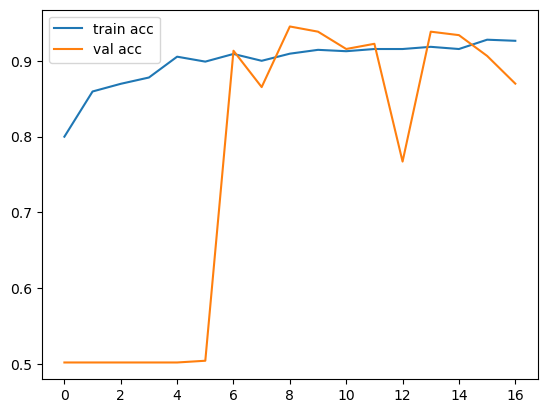

In [25]:

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


### Train Loss Graph

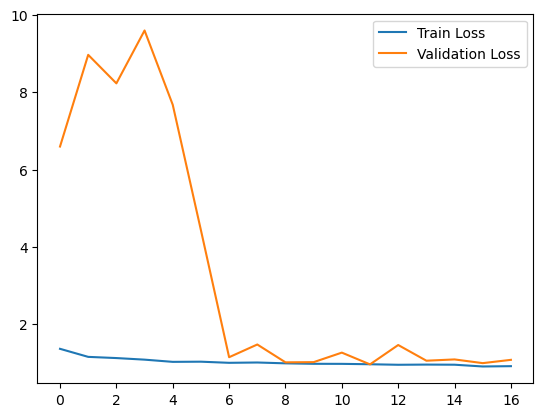

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [59]:
test_generator = val_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)


Found 499 images belonging to 2 classes.


### MODEL EVALUATION:-

In [61]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.8595 - loss: 1.2462
Test Accuracy: 0.8677


In [19]:
 model.save("pneumonia_detection_CNN.h5")

### PREDICTION :-

In [ ]:
from tensorflow.keras.models import load_model

In [3]:
model=load_model('pneumonia_detection_CNN.h5')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    # Load image and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    label = "PNEUMONIA" if prediction[0][0] > 0.5 else "NORMAL"

    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}", fontsize=14, color='red' if label == "PNEUMONIA" else 'green')
    plt.show()

    return label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


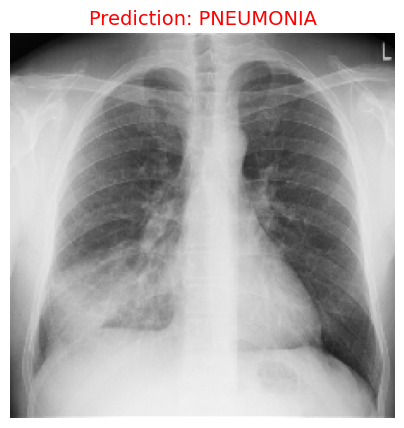

Prediction: PNEUMONIA


In [9]:
img_path = r"C:\Users\albin\OneDrive\Desktop\data science\DEEP LEARNING PROJECT\affect.jpeg"
print("Prediction:", predict_image(img_path, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


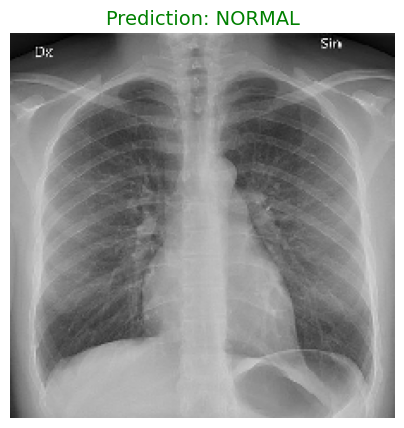

Prediction: NORMAL


In [11]:
img_path = r"C:\Users\albin\OneDrive\Desktop\data science\DEEP LEARNING PROJECT\420px-Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg"
print("Prediction:", predict_image(img_path, model))